In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


The main goal of this program is to detect edges in crater images to extract relative features

In [2]:
# import rasterio

In [3]:
# ##choosing just crater images 
# crater=[]
# for i in range (0, len(code)):
#     if code[i,1]==1 :
#         crater=np.append(crater,code[i,0])

In [4]:
# import os
# image_directory = '/Users/kimia/Desktop/python-planetary/map3'

# # Get a list of all the image files in the directory
# image_files = [f for f in os.listdir(image_directory) if f.endswith('.jpg')]

In [5]:
# names = crater
# images=[]
# for image_file in os.listdir(image_directory):
#     # Check if the image name is in the list of names
#     if image_file in names:
#         # Open the image file
#         with rasterio.open(os.path.join(image_directory, image_file)) as src:
#             # Read the image into a NumPy array
#             image = src.read()
            
#             # Add the image to the list
#             images.append(image)

# # Convert the list of images to a NumPy array
# images_crater = np.array(images)

In [6]:
# ##saving crater image dataset as a numpy array 
# np.save('images_crater.npy', images_crater)

In [7]:
images_crater=np.load("images_crater.npy")

In [14]:
images_crater.shape

(4900, 1, 227, 227)

Text(0.5, 1.0, 'A sample crater image from dataset')

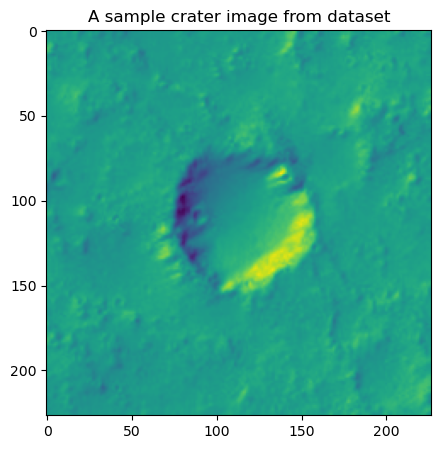

In [60]:
a=np.random.randint(0,len(images_crater))
sample=images_crater[a,0,:,:]
plt.figure(figsize=(5,5))
plt.imshow(sample)
plt.title("A sample crater image from dataset")

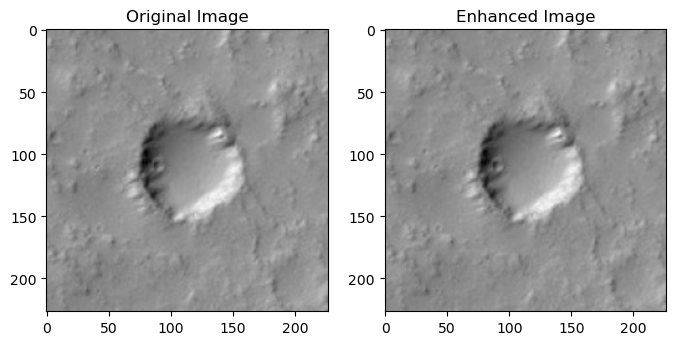

In [66]:
##smoothes out - good for noise reduction - not so much noise - 

from skimage import io, color, filters
blurred_image = filters.gaussian(sample, sigma=1)

# Calculate the unsharp mask of the image
unsharp_mask = sample - blurred_image

# Add the unsharp mask to the original image to enhance the details
enhanced_image = sample + unsharp_mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(sample, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(enhanced_image, cmap='gray')
ax2.set_title('Enhanced Image')
plt.show()

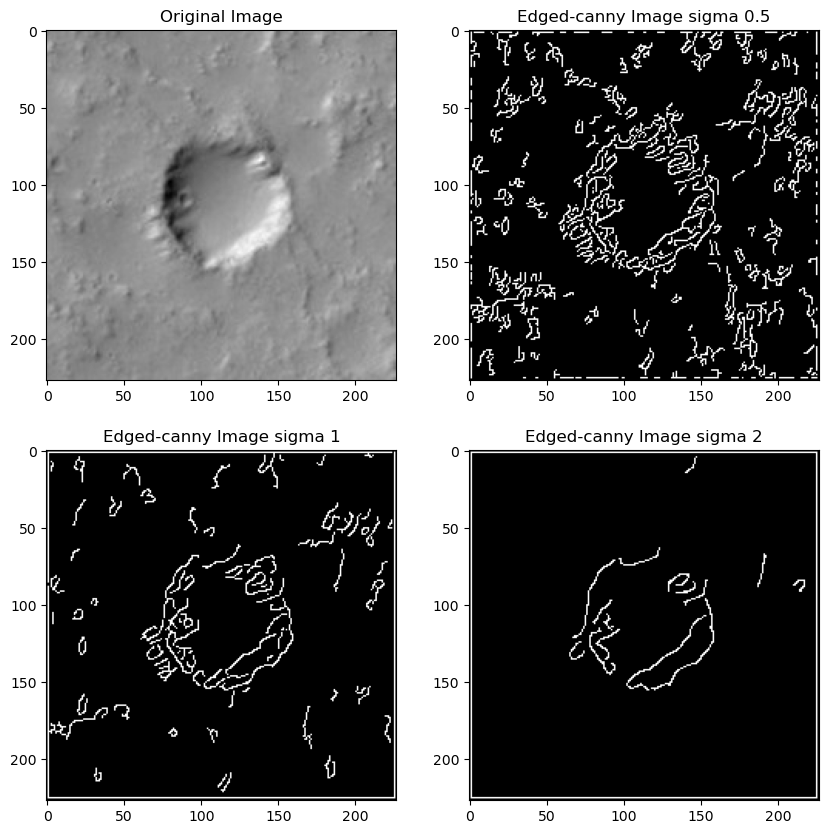

In [62]:
from skimage import io, feature


edges = feature.canny(sample, sigma=0.5)
edges2=feature.canny(sample, sigma=1)
edges3=feature.canny(sample, sigma=2)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# fig, (ax1, ax2 , ax3, ax4) = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].imshow(sample, cmap='gray')
ax[0,0].set_title('Original Image')

ax[0,1].imshow(edges, cmap='gray')
ax[0,1].set_title('Edged-canny Image sigma 0.5')

ax[1,0].imshow(edges2, cmap='gray')
ax[1,0].set_title('Edged-canny Image sigma 1')

ax[1,1].imshow(edges3, cmap='gray')
ax[1,1].set_title('Edged-canny Image sigma 2')




plt.show()

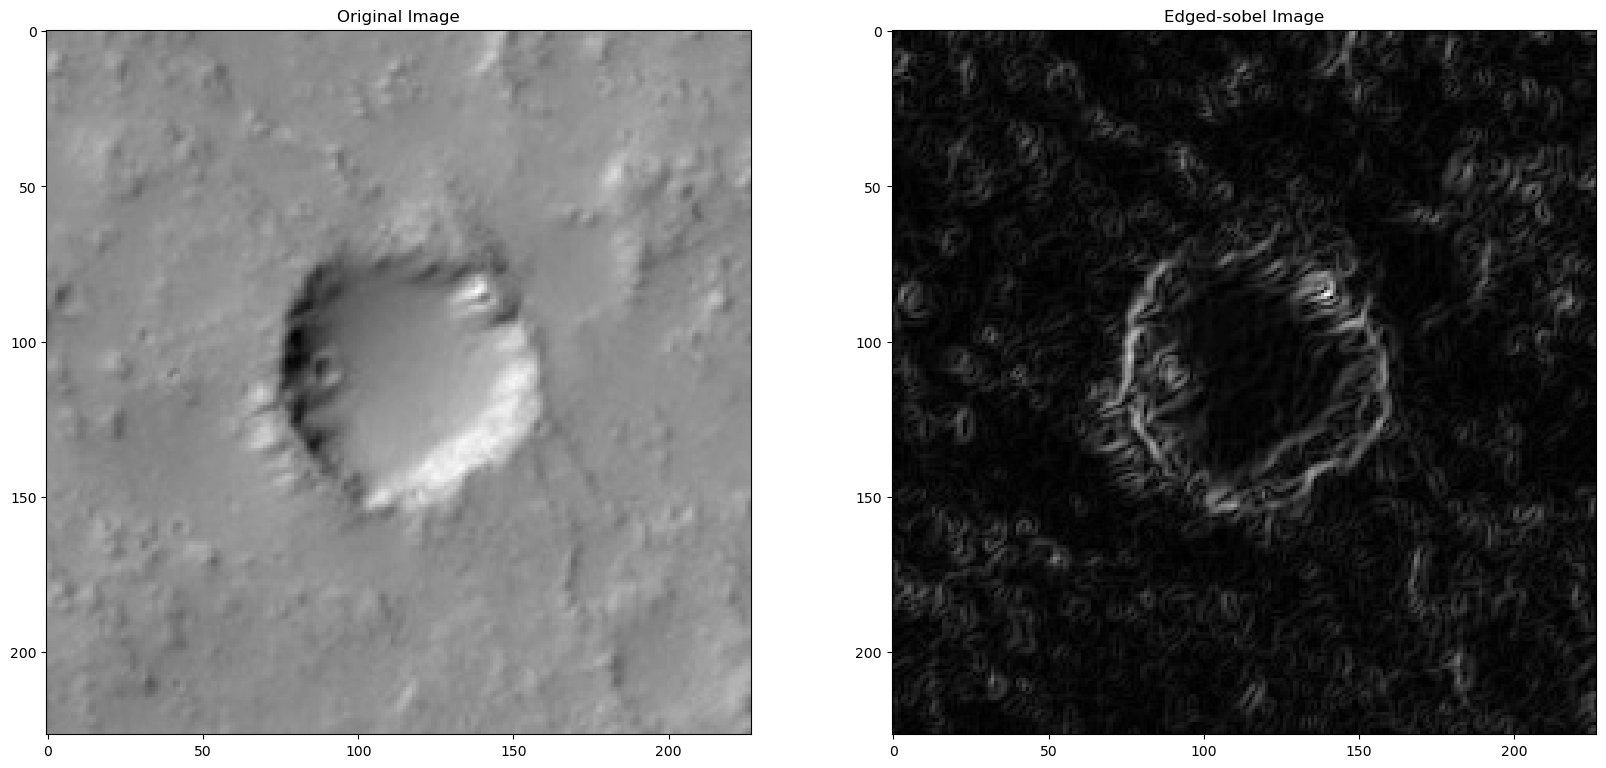

In [63]:
from skimage import io, filters


edges = filters.sobel(sample)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(sample, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(edges, cmap='gray')
ax2.set_title('Edged-sobel Image')
plt.show()

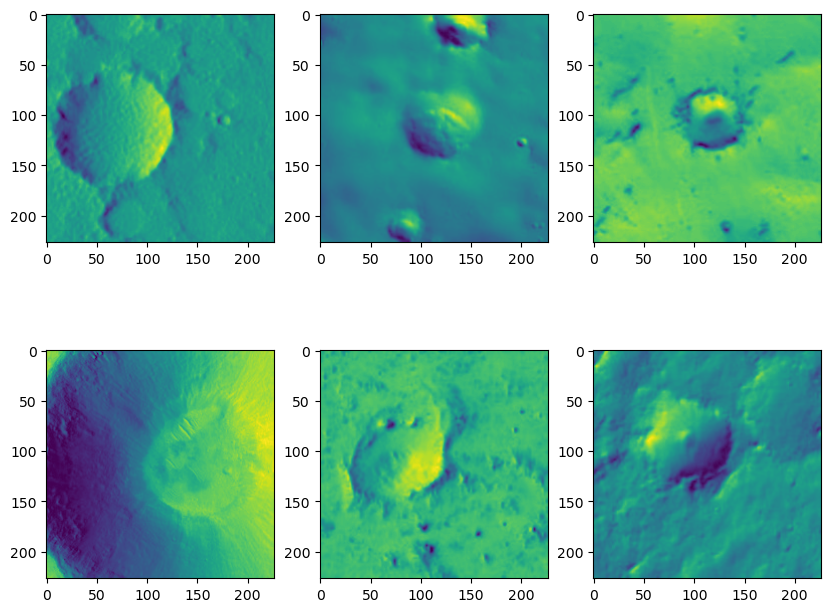

In [64]:


# Load the images into a NumPy array
images = images_crater

# Choose five random indices
indices = np.random.randint(0, images.shape[0], size=6)

# Select the images at the random indices
selected_images = images[indices]

# Create a figure with a 2x3 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# Iterate over the subplots
for ax, image in zip(axs.flat, selected_images):
    # Display the image in the subplot
    ax.imshow(image[0,:,:])

# Show the plot
plt.show()


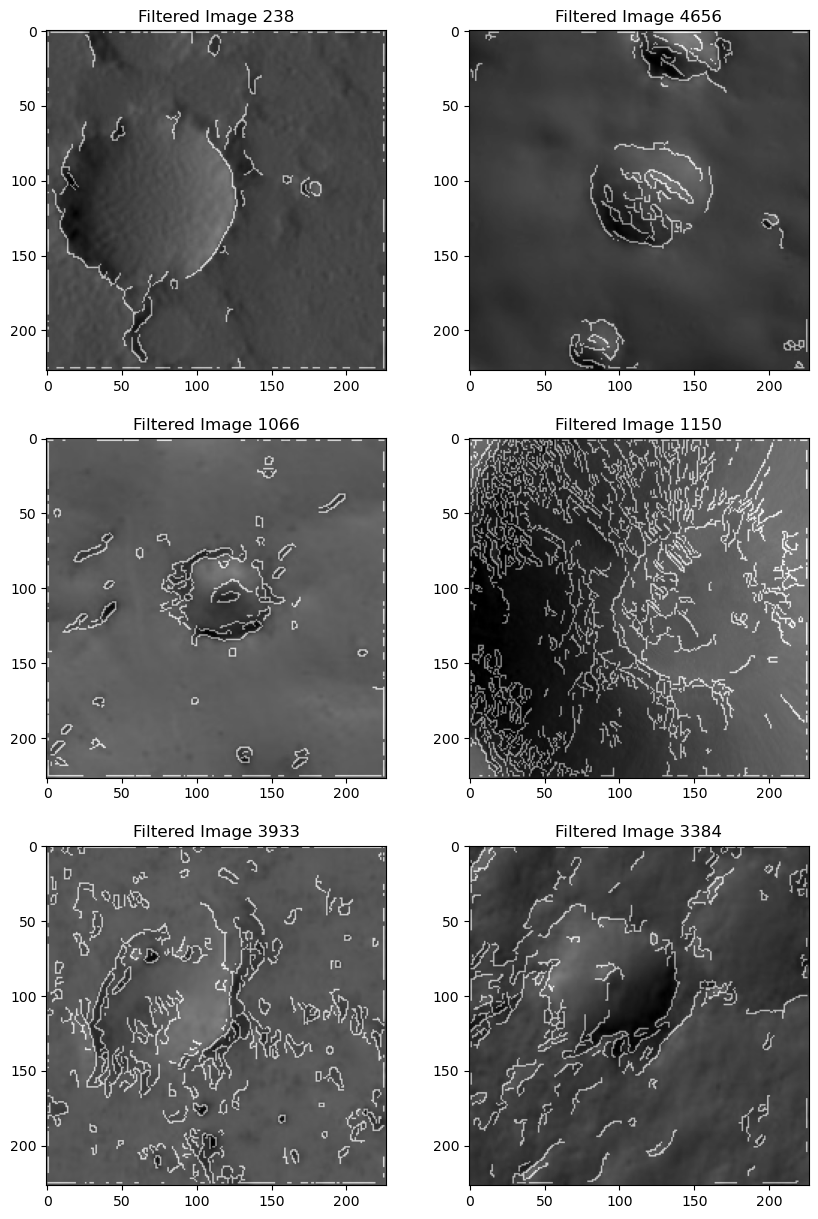

In [68]:


# Select the images at the random indices
selected_images = images[indices]

# Create a figure with a 3x2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Iterate over the subplots
for ax, image, index in zip(axs.flat, selected_images, indices):
    # Apply the Canny filter to the image
    filtered_image = feature.canny(image[0,:,:], sigma= 0.5)
    
    # Display the original image in the left subplot
    ax.imshow(image[0,:,:], cmap='gray')
    ax.set_title(f'Original Image {index+1}')
    
    # Display the filtered image in the right subplot
    ax.imshow(filtered_image, cmap='gray', alpha=0.5)
    ax.set_title(f'Filtered Image {index+1}')

# Show the plot
plt.show()
